# **Covid Evaluation**
## Gabriel Becton
### 2/10/22


## **OBJECTIVE**

#### **I will be looking into the covid dataset that is posted on Kaggle.** [https://www.kaggle.com/yamqwe/omicron-covid19-variant-daily-cases](https://www.kaggle.com/yamqwe/omicron-covid19-variant-daily-cases)
#### **With this dataset I will explore the data to better understand the covid variants, their relation and correlation with different countries.**

In [ ]:
# First lets import all of the python scripts that will be needed for this evaluation
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline 
from google.colab import files

### **Importing the data**

In [ ]:
# Next I will import the file into google colab so that I can make a data frame.
data_to_load = files.upload()

Saving covid-variants.csv to covid-variants.csv






### **Evaluate the Dataset by putting it into a pandas dataframe.**

In [ ]:
df = pd.read_csv('covid-variants.csv')

In [ ]:
# to show how many rows and columns the dataframe has
df.shape

(100416, 6)

In [ ]:
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [ ]:
df.tail()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6
100415,Zimbabwe,2021-11-01,non_who,0,0.0,6


In [ ]:
df.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [ ]:
# How many different variants are there?
df['variant'].unique()

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [ ]:
# How many countries are in the dataframe?
len(df['location'].unique())

121

In [ ]:
df['location'].unique()

array(['Angola', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahrain',
       'Bangladesh', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Monaco',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Nepal',
       'Netherlands', 'New

#### As you can see we have no missing values. Therefore all of the rows should be good for usage. There are only 6 columns, each looking to be important to the data. So I will not be doing any data cleaning yet.

### **Analyzing the Data using Visualiztion**




In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date'].dtype

dtype('<M8[ns]')

#### Lets take a look to see which variant is the most commonly found.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Postive Cases')

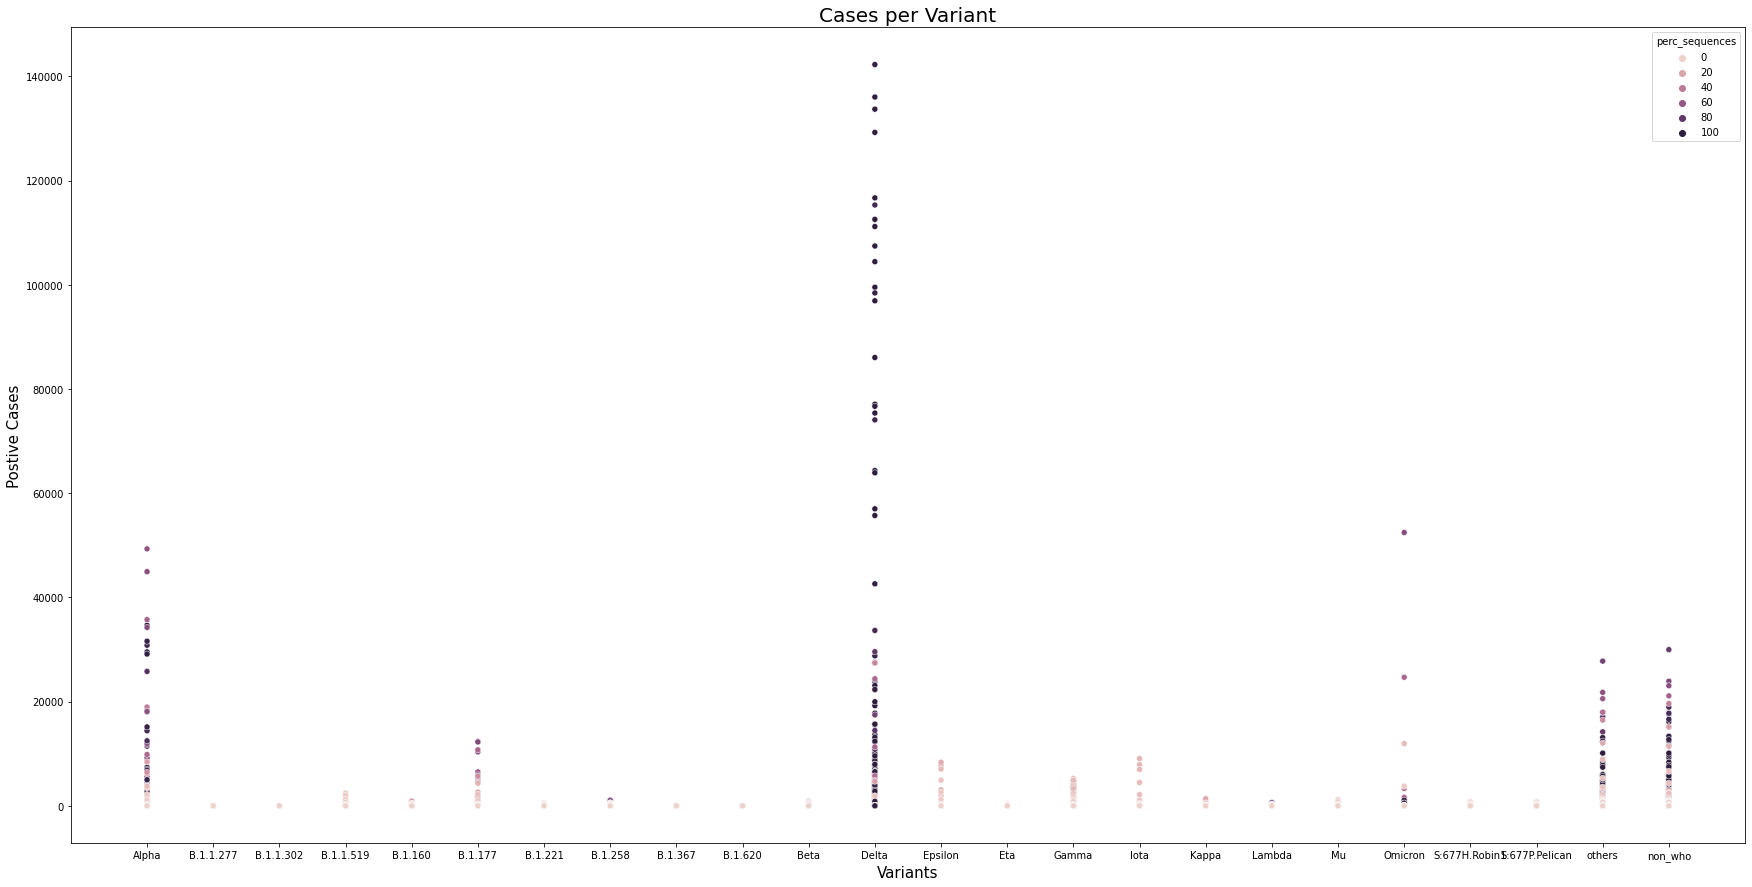

In [ ]:
plt.figure(figsize=[30,15])
sns.scatterplot(df['variant'], df['num_sequences'], hue=df['perc_sequences'])
plt.title('Cases per Variant', fontdict= {'fontsize': 20})
plt.xlabel('Variants',fontdict= {'fontsize':15})
plt.ylabel('Postive Cases', fontdict={'fontsize': 15})

From the above scatter plot we can see that Delta, Alpha and Omicron are the main variants of Covid. Therefore, we will be only looking at these 3.

**Creating 3 dataframe for Omicron, Alpha and Delta.** 

In [ ]:
Omicron_df = df[df['variant']== 'Omicron']

In [ ]:
Omicron_df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
1699,Argentina,2021-12-13,Omicron,13,14.94,87
1723,Argentina,2021-12-27,Omicron,80,85.11,94
3331,Australia,2021-11-29,Omicron,8,0.40,1992
3355,Australia,2021-12-13,Omicron,366,13.07,2800
3379,Australia,2021-12-27,Omicron,1319,76.42,1726
...,...,...,...,...,...,...
97819,United States,2021-12-27,Omicron,24681,50.13,49235
97843,United States,2022-01-05,Omicron,28,80.00,35
98923,Vietnam,2021-12-27,Omicron,1,2.00,50
99715,Zambia,2021-12-13,Omicron,39,100.00,39


In [ ]:
Alpha_df = df[df['variant']=='Alpha']

In [ ]:
Alpha_df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
24,Angola,2020-08-31,Alpha,0,0.0,1
48,Angola,2020-09-28,Alpha,0,0.0,10
72,Angola,2020-10-12,Alpha,0,0.0,29
96,Angola,2020-10-26,Alpha,0,0.0,7
...,...,...,...,...,...,...
100296,Zimbabwe,2021-09-06,Alpha,0,0.0,14
100320,Zimbabwe,2021-09-20,Alpha,0,0.0,6
100344,Zimbabwe,2021-10-04,Alpha,0,0.0,2
100368,Zimbabwe,2021-10-18,Alpha,0,0.0,5


In [ ]:
Delta_df = df[df['variant']=='Delta']

In [ ]:
Delta_df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
11,Angola,2020-07-06,Delta,0,0.0,3
35,Angola,2020-08-31,Delta,0,0.0,1
59,Angola,2020-09-28,Delta,0,0.0,10
83,Angola,2020-10-12,Delta,0,0.0,29
107,Angola,2020-10-26,Delta,0,0.0,7
...,...,...,...,...,...,...
100307,Zimbabwe,2021-09-06,Delta,14,100.0,14
100331,Zimbabwe,2021-09-20,Delta,6,100.0,6
100355,Zimbabwe,2021-10-04,Delta,2,100.0,2
100379,Zimbabwe,2021-10-18,Delta,5,100.0,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



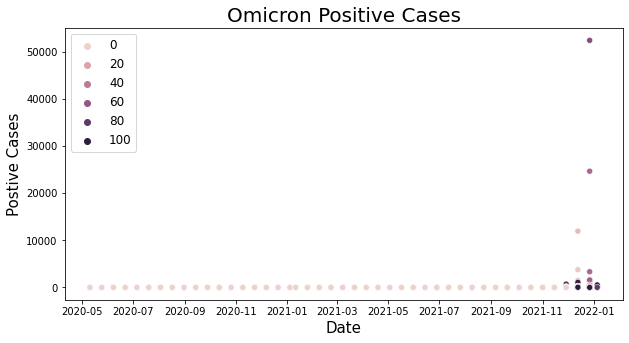

In [ ]:
from numpy.core.fromnumeric import size
plt.figure(figsize=[10,5])
sns.scatterplot(Omicron_df['date'], Omicron_df['num_sequences'], hue=Omicron_df['perc_sequences'])
plt.title('Omicron Positive Cases', fontdict= {'fontsize': 20})
plt.xlabel('Date',fontdict= {'fontsize':15})
plt.ylabel('Postive Cases', fontdict={'fontsize': 15})
plt.legend(loc=2,prop={'size': 12})

**It looks like the omicron variant began to appear around november of 2021 so lets get rid of the 0 vaules in the num_sequence column. So we can see when the variant really began to appear.**

In [ ]:
# If there are 0 cases found then the data will not appear. We want this because we want to see when it began and to eliminate data
# That would otherwise be useless.
Omicron_df = Omicron_df[Omicron_df['num_sequences'] > 0]

In [ ]:
Alpha_df = Alpha_df[Alpha_df['num_sequences'] > 0]

In [ ]:
Delta_df = Delta_df[Delta_df['num_sequences'] > 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



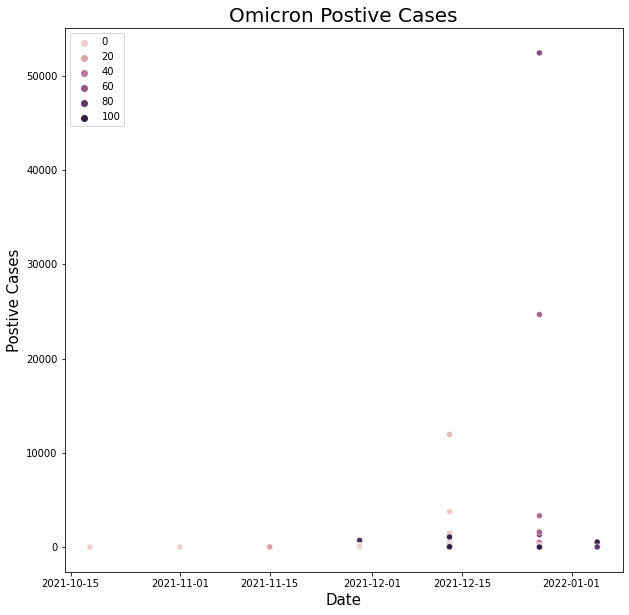

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(Omicron_df['date'], Omicron_df['num_sequences'], hue=Omicron_df['perc_sequences'])
plt.title('Omicron Postive Cases', fontdict= {'fontsize': 20})
plt.xlabel('Date',fontdict= {'fontsize':15})
plt.ylabel('Postive Cases', fontdict={'fontsize': 15})
plt.legend(loc=2,prop={'size': 10})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



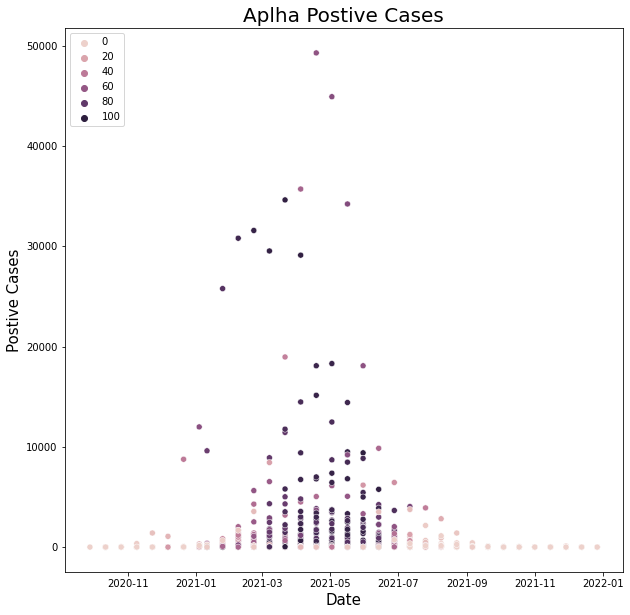

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(Alpha_df['date'], Alpha_df['num_sequences'], hue=Alpha_df['perc_sequences'])
plt.title('Aplha Postive Cases', fontdict= {'fontsize': 20})
plt.xlabel('Date',fontdict= {'fontsize':15})
plt.ylabel('Postive Cases', fontdict={'fontsize': 15})
plt.legend(loc=2,prop={'size': 10})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



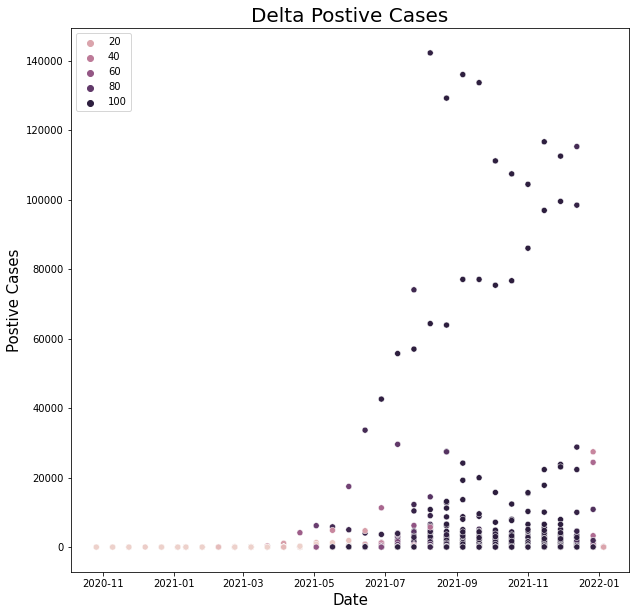

In [ ]:
plt.figure(figsize=[10,10])
sns.scatterplot(Delta_df['date'], Delta_df['num_sequences'], hue=Delta_df['perc_sequences'])
plt.title('Delta Postive Cases', fontdict= {'fontsize': 20})
plt.xlabel('Date',fontdict= {'fontsize':15})
plt.ylabel('Postive Cases', fontdict={'fontsize': 15})
plt.legend(loc=2,prop={'size': 10})

**Lets see which countries have the most cases of covid**

In [ ]:
Country_df = df.groupby('location').sum().sort_values(by='num_sequences', ascending=False).reset_index().head(10)

In [ ]:
Country_df

,location,num_sequences,perc_sequences,num_sequences_total
0,United States,2420758,6738.15,49960248
1,United Kingdom,1703122,6232.85,37427568
2,Germany,358070,6598.02,7851432
3,Denmark,335124,6547.48,6728880
4,Canada,226219,6761.20,4365240
5,Japan,215319,6848.17,4268136
6,France,164917,6571.21,3602784
7,Sweden,152958,6499.92,3308496
8,Switzerland,121486,6535.87,2392008
9,India,111933,6698.44,2184672


No handles with labels found to put in legend.


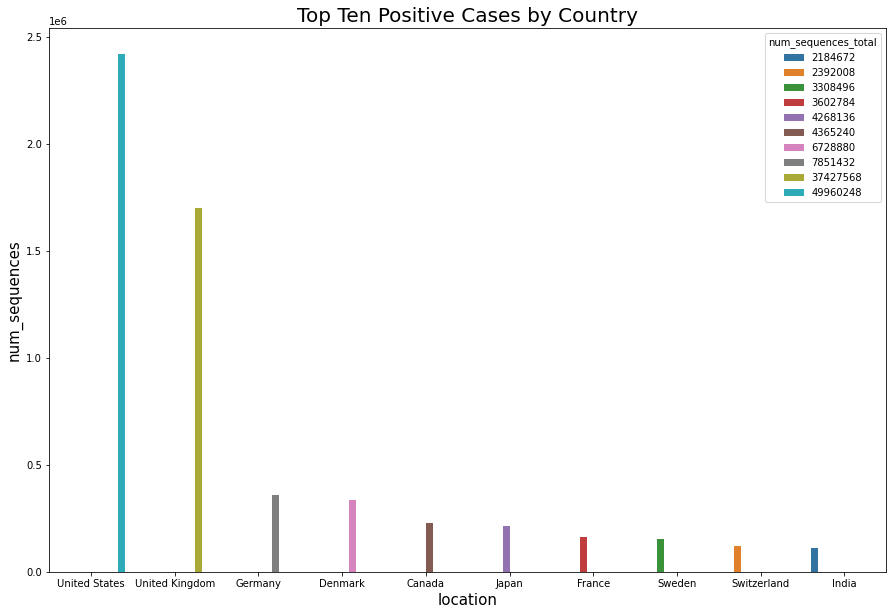

In [ ]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=[15,10])
plt.title('Top Ten Positive Cases by Country', fontdict= {'fontsize': 20})
plt.legend(loc=2,prop={'size': 10})
sns.barplot(x='location', y = 'num_sequences', hue = 'num_sequences_total',data= Country_df)

In [ ]:
fig = px.pie(Country_df, values='num_sequences', names='location' ,title= 'Top Ten Countries Percentage' ,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
# Creating a new data frame for only the United States.
df_Omi_US = Omicron_df[Omicron_df['location'] == 'United States']
df_Omi_UK = Omicron_df[Omicron_df['location'] == 'United Kingdom']
df_Omi_Germany = Omicron_df[Omicron_df['location'] == 'Germany']

In [ ]:
df_Alp_US = Alpha_df[Alpha_df['location'] == 'United States']
df_Alp_UK = Alpha_df[Alpha_df['location'] == 'United Kingdom']
df_Alp_Germany = Alpha_df[Alpha_df['location'] == 'Germany']

In [ ]:
df_Del_US = Delta_df[Delta_df['location'] == 'United States']
df_Del_UK = Delta_df[Delta_df['location'] == 'United Kingdom']
df_Del_Germany = Delta_df[Delta_df['location'] == 'Germany']

In [ ]:

fig = go.Figure()


fig.add_trace(go.Scatter(x = df_Omi_US['date'],
                         y = df_Omi_US['num_sequences'],
                         mode = 'lines',
                         name = 'United States',
                         marker_color = 'DarkBlue'))

fig.add_trace(go.Scatter(x = df_Omi_UK['date'],
                         y = df_Omi_UK['num_sequences'],
                         mode = 'lines',
                         name = 'United Kingdom',
                         marker_color = 'DarkOrchid',
                         line = dict(dash = 'dot')))

fig.add_trace(go.Scatter(x = df_Omi_Germany['date'],
                         y = df_Omi_Germany['num_sequences'],
                         mode = 'lines',
                         name = 'Germany',
                         marker_color = 'Red',
                         line = dict(dash = 'dash')))


fig.update_layout(title = 'Top Three Countries by Positive Cases of Omicron Variant',
                  title_x = 0.5,
                  title_font= dict(size = 18, color = 'Darkred'),
                  template = 'plotly_white',
                  xaxis_title = 'Date',
                  yaxis_title = 'Positive Cases',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="Black"))



fig.show()

In [ ]:

fig = go.Figure()


fig.add_trace(go.Scatter(x = df_Alp_US['date'],
                         y = df_Alp_US['num_sequences'],
                         mode = 'lines',
                         name = 'United States',
                         marker_color = 'DarkBlue'))

fig.add_trace(go.Scatter(x = df_Alp_UK['date'],
                         y = df_Alp_UK['num_sequences'],
                         mode = 'lines',
                         name = 'United Kingdom',
                         marker_color = 'DarkOrchid',
                         line = dict(dash = 'dot')))

fig.add_trace(go.Scatter(x = df_Alp_Germany['date'],
                         y = df_Alp_Germany['num_sequences'],
                         mode = 'lines',
                         name = 'Germany',
                         marker_color = 'Red',
                         line = dict(dash = 'dash')))


fig.update_layout(title = 'Top Three Countries by Positive Cases of Alpha Variant',
                  title_x = 0.5,
                  title_font= dict(size = 18, color = 'Darkred'),
                  template = 'plotly_white',
                  xaxis_title = 'Date',
                  yaxis_title = 'Positive Cases',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="Black"))



fig.show()

In [ ]:

fig = go.Figure()


fig.add_trace(go.Scatter(x = df_Del_US['date'],
                         y = df_Del_US['num_sequences'],
                         mode = 'lines',
                         name = 'United States',
                         marker_color = 'DarkBlue'))

fig.add_trace(go.Scatter(x = df_Del_UK['date'],
                         y = df_Del_UK['num_sequences'],
                         mode = 'lines',
                         name = 'United Kingdom',
                         marker_color = 'DarkOrchid',
                         line = dict(dash = 'dot')))

fig.add_trace(go.Scatter(x = df_Del_Germany['date'],
                         y = df_Del_Germany['num_sequences'],
                         mode = 'lines',
                         name = 'Germany',
                         marker_color = 'Red',
                         line = dict(dash = 'dash')))


fig.update_layout(title = '<b>Top Three Countries by Positive Cases of Delta Variant',
                  title_x = 0.5,
                  title_font= dict(size = 18, color = 'Darkred'),
                  template = 'plotly_white',
                  xaxis_title = 'Date',
                  yaxis_title = 'Positive Cases',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="Black"))



fig.show()

## **What I learned**
To begin I took a look to see which variants were the most common in the dataset. Although the dataset does not include every variant of Covid-19, it seemed to show the most important. From the data I was able to see that the three most common variants that showed more than the rest were Alpha variant, Delta variant and the Omiron variant. After this discovery, I checked to see when each variant first appeared, how long it lasted and the amount of postive cases that were found. Lastly, I sought to find the coorelation of these 3 variants in contrast to the location(country). Concluding that the Alpha variant began first, its outbreak lasting from September 2020 to December 2021. Delta was next, lasting from November 2020 to January 2022. Finally, Omicron was the latest variant beginning in November of 2021 and is still on-going. The highest number of postive Cases Alpha was 49,000 in the United States, for Delta it was 142,000 in the United States and for Omicron it was 52,000 in the United Kingdom. Ultimatly, the location that had the most positive cases is the United States excluding the Omicron variant.
